# Loan Default Prediction

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
data_train = pd.read_csv('/Users/johnmirror/TQF_Project_Data/train_v2.csv', sep=",", dtype=float, na_values='NA')

In [3]:
data_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1.0,126.0,10.0,0.686842,1100.0,3.0,13699.0,7201.0,4949.0,126.75,...,5.0,2.14,-1.54,1.18,0.1833,0.7873,1.0,0.0,5.0,0.0
1,2.0,121.0,10.0,0.782776,1100.0,3.0,84645.0,240.0,1625.0,123.52,...,6.0,0.54,-0.24,0.13,0.1926,-0.6787,1.0,0.0,5.0,0.0
2,3.0,126.0,10.0,0.500080,1100.0,3.0,83607.0,1800.0,1527.0,127.76,...,13.0,2.89,-1.73,1.04,0.2521,0.7258,1.0,0.0,5.0,0.0
3,4.0,134.0,10.0,0.439874,1100.0,3.0,82642.0,7542.0,1730.0,132.94,...,4.0,1.29,-0.89,0.66,0.2498,0.7119,1.0,0.0,5.0,0.0
4,5.0,109.0,9.0,0.502749,2900.0,4.0,79124.0,89.0,491.0,122.72,...,26.0,6.11,-3.82,2.51,0.2282,-0.5399,0.0,0.0,5.0,0.0


## Data Preprocessing

In [7]:
data_train.shape[0]
data_train['loss'].isnull().sum()  # count NAs in loss
data_train['id'].isnull().sum()  # count NAs in ID
(data_train['loss'] > 0).value_counts()  # count # of defaults
sum(data_train.ix[:, 1:].duplicated());  # check for duplicate rows

In [8]:
## code to remove duplicate columns (all rows)
remove = []
cols = data_train.columns
for i in range(len(cols) - 1):
    v = data_train[cols[i]].values
    for j in range(i + 1, len(cols)):
        if np.array_equal(v, data_train[cols[j]].values):
            remove.append(cols[j])
            #print((cols[i], cols[j]))

len(remove)  # number of duplicate pairs
len(set(remove))  # number of columns to remove
data_train = data_train.drop(remove, axis=1, inplace=False)

## code to remove constant columns (all rows)
remove = []
for i in range(data_train.shape[1]):
    if data_train.ix[:, i].nunique() == 1:
        remove.append(cols[i])
        #print(cols[i])

len(set(remove))  # number of columns to remove
data_train = data_train.drop(remove, axis=1, inplace=False)

# data_train = data_train.sample(frac=1) # shuffling the rows - check: probably without rewriting (changing row numbers)
# -> no need because I am dividing it randomly into training and testing sets?

sum(data_train.isnull().sum())  # counts number of NAs in the dataset
sum(data_train.isnull().sum()) / (data_train.shape[0] * (data_train.shape[1] - 1))
data_train.shape[0] - data_train.dropna().shape[0]  # count number of rows without NA
(data_train.shape[0] - data_train.dropna().shape[0]) / data_train.shape[0]
## only 1% of all values are NA, but about 50% of rows contain at least one NA value
np.count_nonzero(data_train.iloc[:, 1:-1].isnull().sum()) / data_train.iloc[:, 1:-1].shape[
    1]  # 72% of features contain some NAs
data_train.fillna(data_train.mean(), inplace=True);  # input missing values (with mean) -> OK (checked)

## code to check for number of unique values
uncols = []
for i in range(data_train.shape[1]):
    uncols.append(data_train.ix[:, i].nunique())

uncols.sort()  # sort (ascending)

## code to check for binary variables
binary = []
for i in range(data_train.shape[1]):
    if (data_train.ix[:, i].nunique() == 2 and data_train.ix[:, i].min() == 0 and data_train.ix[:, i].max() == 1):
        binary.append(cols[i])

y = (data_train['loss'].values > 0)  # binary variable indicating if there was a default
X = data_train.iloc[:, 1:-1]  # all features except ID and loss variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # train/test split

## Initial Classifications

### Logistic Regression 1

In [13]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.908


### Confusion matrix L1

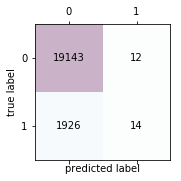

In [18]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.BuPu, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### Learning curve L1

computationally expensive

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='cyan')
plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression 2

In [23]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.908


### Confusion matrix 2

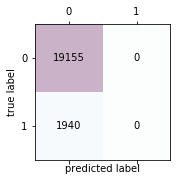

In [32]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.BuPu, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### SVM 1

computationally expensive - killed after 30 minutes

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()), 
                    #('pca', PCA(n_components=2)),
                    ('svm', SVC(kernel='rbf', random_state=0, gamma=0.20, C=5.0))])

pipe_lr.fit(X_train, y_train)  # killed after 20 minutes
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

### Feature selection

In [35]:
np.any(np.isnan(X)) # ok
np.all(np.isfinite(X)) # ok
# -> must be value too large for float32
X.values.max()
np.finfo('float32').max
# Note: Internally, its dtype will be converted to dtype=np.float32
X.values.min() # ok
X.columns[(sum(X.values>np.finfo('float32').max))>0]
X.columns.get_loc('f391')
X.columns.get_loc('f627')

# drop the two columns
del X['f391']
del X['f627']

In [37]:
feat_labels = X.columns
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))
# -> assigns the highest importance to the variables in order form first to last??? It always prints feat_labels in order
#    from 0 to 31 regardless on any weights
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]])) # is it supposed to be like this?!

 1) f67                            0.004184
 2) f670                           0.003530
 3) f3                             0.003162
 4) f468                           0.003097
 5) f471                           0.002975
 6) f404                           0.002937
 7) f655                           0.002933
 8) f211                           0.002929
 9) f766                           0.002907
10) f746                           0.002860
11) f596                           0.002857
12) f598                           0.002849
13) f432                           0.002789
14) f212                           0.002678
15) f271                           0.002655
16) f629                           0.002647
17) f412                           0.002641
18) f75                            0.002637
19) f384                           0.002626
20) f282                           0.002620
21) f76                            0.002590
22) f393                           0.002535
23) f405                        

In [47]:
sfm = SelectFromModel(forest,threshold=0.002303,prefit = True)
X_sel = sfm.transform(X)
X_sel.shape

(105471, 50)

In [48]:
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=0)

### Logistic Regression 3

In [51]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_sel_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_sel_test, y_test))
y_pred = pipe_lr.predict(X_sel_test)

Test Accuracy: 0.908


### Confusion matrix

In [52]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[19153     2]
 [ 1934     6]]


## Feature extraction

not yet implemented